# Assignment Python 2 - Statistical Treatment for Retail Datasets

**Nama: Shendy Krisyohanda**  
**Kode Peserta: PYTN-KS08-21**  
***MSIB Batch 3***

## Prepping Data

Import Pustaka yang dibutuhkan:

In [737]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

Mengambil dataset nyc-rolling-sales di folder dataset.

In [738]:
df = pd.read_csv("dataset/nyc-rolling-sales.csv")

## Exploratory Data Analysis

Menampilkan 5 baris data teratas menggunakan fungsi `head()`.

In [739]:
pd.set_option("display.max.columns", None)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Menampilkan 5 baris data terbawah menggunakan fungsi `tail()`.

In [740]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


Mengetahui jumlah total baris dan kolom dalam kumpulan data menggunakan `.shape`.

In [741]:
df.shape #(row, column)

(84548, 22)

Terdapat **84.548 baris** dan **22 kolom** dalam dataset/kumpulan data.  

Menghapus beberapa kolom yang tidak digunakan dan memiliki banyak nilai NaN menggunakan `drop()`.

In [742]:
drop_column = ['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER']
df.drop(drop_column, axis=1, inplace=True)

Memeriksa data yang duplikat pada setiap kolom.

In [743]:
sum(df.duplicated(df.columns))

765

Hapus duplikat dan periksa apakah berhasil?

In [744]:
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

Data duplikat telah terhapus.  
Mengetahui kolom dan tipe data yang sesuai, dan menemukan apakah kolom tersebut berisi nilai null atau tidak menggunakan `info()`.

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         83783 non-null  int64 
 1   NEIGHBORHOOD                    83783 non-null  object
 2   BUILDING CLASS CATEGORY         83783 non-null  object
 3   TAX CLASS AT PRESENT            83783 non-null  object
 4   BLOCK                           83783 non-null  int64 
 5   LOT                             83783 non-null  int64 
 6   BUILDING CLASS AT PRESENT       83783 non-null  object
 7   ADDRESS                         83783 non-null  object
 8   ZIP CODE                        83783 non-null  int64 
 9   RESIDENTIAL UNITS               83783 non-null  int64 
 10  COMMERCIAL UNITS                83783 non-null  int64 
 11  TOTAL UNITS                     83783 non-null  int64 
 12  LAND SQUARE FEET                83783 non-null

Menentukan jenis tipe data yang sesuai pada setiap kolom menggunakan `pandas`.

In [746]:
#Let's convert some of the columns to appropriate datatype

df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['BOROUGH'] = df['BOROUGH'].astype('category')

Memeriksa missing values pada setiap kolom.

In [747]:
#checking missing values

df.columns[df.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

Terdapat 3 kolom yang memiliki nilai null yakni `'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'`.

In [748]:
miss=df.isnull().sum()/len(df)
miss=miss[miss>0]
miss.sort_values(inplace=True)
miss

SALE PRICE          0.17
LAND SQUARE FEET    0.31
GROSS SQUARE FEET   0.33
dtype: float64

Mengatasi missing values dapat dengan menghapus baris nilai yang hilang atau dapat mengisinya dengan rata-rata(mean), median(nilai tengah), atau relasi lainnya.

Untuk saat ini, isi dengan nilai rata-rata.

In [749]:
# For time being, let's fill these up with mean values.
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())

Memeriksa missing values kolom land square feet dan gross square feet.

In [750]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

Kedua kolom sudah tidak memiliki missing values, selanjutnya hapus missing values pada kolom sale price menggunakan `dropna()`.

In [751]:
df.dropna(inplace=True)

In [752]:
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Sudah tidak ada missing values. Selanjutnya, membuat box plot untuk melihat outliers pada kolom sale price.

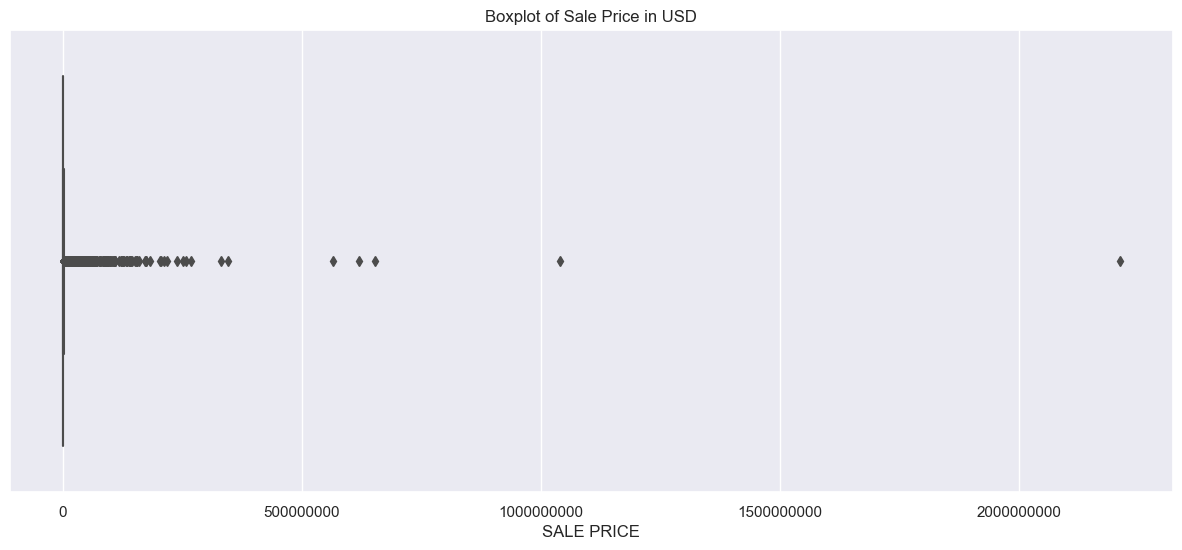

In [753]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Sale Price in USD')
plt.show()

C:\Users\Krisyohanda\AppData\Local\Temp\ipykernel_27560\2962733142.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SALE PRICE'])


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

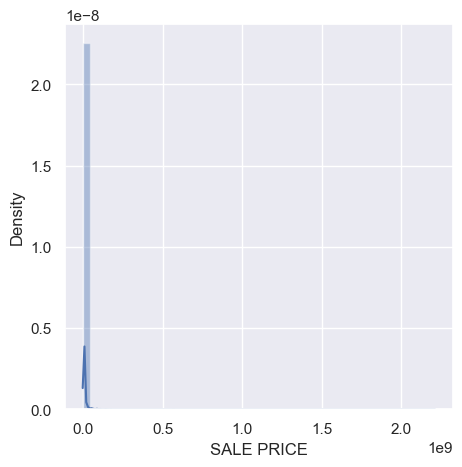

In [754]:
sns.distplot(df['SALE PRICE'])

In [755]:
# Remove observations that fall outside those caps
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

C:\Users\Krisyohanda\AppData\Local\Temp\ipykernel_27560\2962733142.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SALE PRICE'])


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

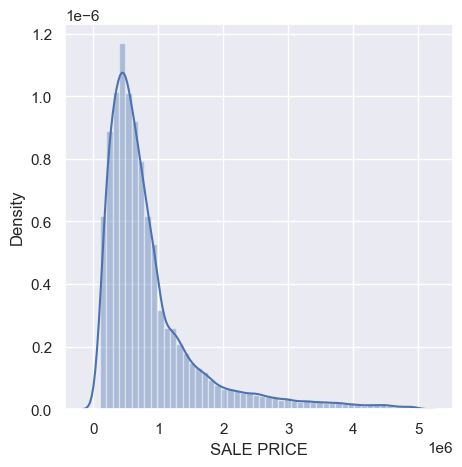

In [756]:
sns.distplot(df['SALE PRICE'])

0.198994620445416


C:\Users\Krisyohanda\AppData\Local\Temp\ipykernel_27560\169373770.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

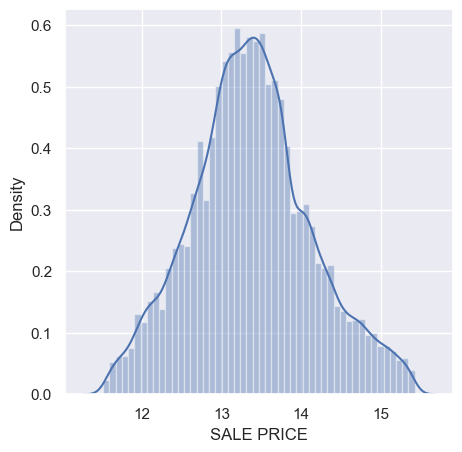

In [757]:
sales=np.log(df['SALE PRICE'])
print(sales.skew())
sns.distplot(sales)

In [758]:
df[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

,TOTAL UNITS,SALE PRICE
1,1,24898
0,0,15554
2,2,9583
3,3,2737
4,4,708
...,...,...
40,51,1
33,34,1
38,47,1
37,39,1


Menghapus baris dengan TOTAL UNITS == 0 dan satu outlier dengan 2261 unit

In [759]:
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 2261)] 

In [760]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.00,6794.00,1913,2,C4,3936272.00,2016-09-23
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.00,4226.00,1920,2,C4,3192840.00,2016-09-23
76,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,211 EAST 3RD STREET,10009,1,0,1,3854.48,3894.42,0,2,R2,620000.00,2016-12-30
79,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,324 EAST 4TH STREET,10009,1,0,1,3854.48,3894.42,1920,2,R4,762669.00,2016-09-21
80,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,324 EAST 4TH STREET,10009,1,0,1,3854.48,3894.42,1920,2,R4,772851.00,2016-09-12


Ganti nilai pada kolom `BOROUGH` dengan 1 => Manhattan, 2 => Bronx, 3 => Brooklyn, 4 => Queens, dan 5 => Staten Island.

In [761]:
df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.00,6794.00,1913,2,C4,3936272.00,2016-09-23
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.00,4226.00,1920,2,C4,3192840.00,2016-09-23
76,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,211 EAST 3RD STREET,10009,1,0,1,3854.48,3894.42,0,2,R2,620000.00,2016-12-30
79,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,324 EAST 4TH STREET,10009,1,0,1,3854.48,3894.42,1920,2,R4,762669.00,2016-09-21
80,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,324 EAST 4TH STREET,10009,1,0,1,3854.48,3894.42,1920,2,R4,772851.00,2016-09-12


  Mendapatkan ringkasan singkat setiap kolom menggunakan fungsi `describe()`.

In [762]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,39024.00,39024.00,39024.00,39024.00,39024.00,39024.00,39024.00,39024.00,39024.00,39024.00
mean,4687.39,463.67,10900.81,1.73,0.08,1.82,3268.73,2646.55,1830.47,934748.90
std,3731.95,714.38,622.12,10.71,1.04,10.86,26573.81,20859.17,475.05,787308.99
min,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,100700.00
25%,1532.00,28.00,10312.00,1.00,0.00,1.00,1958.00,1280.00,1920.00,460000.00
50%,4010.00,62.00,11214.00,1.00,0.00,1.00,2640.00,2000.00,1940.00,688000.00
75%,6799.00,1027.00,11360.00,2.00,0.00,2.00,3854.48,3894.42,1986.00,1081476.25
max,16319.00,9106.00,11694.00,1844.00,126.00,1866.00,4228300.00,3750565.00,2017.00,4996841.00


Pada ringkasan di atas pada kolom `TOTAL UNITS, YEAR BUILT, SALE PRICE, LAND SQUARE FEET, dan GROSS SQUARE FEET` terdapat angka paling kecil 0 padahal tidak boleh ada angka 0 di kolom tersebut.

In [763]:
print("Nilai 0 pada YEAR BUILT: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("Nilai 0 pada TOTAL UNIT: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("Nilai 0 pada SALE PRICE: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())
print("Nilai 0 pada LAND SQUARE FEET: ",df[df['LAND SQUARE FEET']==0]['LAND SQUARE FEET'].count())
print("Nilai 0 pada GROSS SQUARE FEET: ",df[df['GROSS SQUARE FEET']==0]['GROSS SQUARE FEET'].count())

Nilai 0 pada YEAR BUILT:  2449
Nilai 0 pada TOTAL UNIT:  0
Nilai 0 pada SALE PRICE:  0
Nilai 0 pada LAND SQUARE FEET:  4179
Nilai 0 pada GROSS SQUARE FEET:  4225


Mengganti nilai 0 pada ketiga kolom di atas menggunakan fungsi `replace()`.

In [764]:
df['YEAR BUILT'].replace(0, np.nan, inplace=True)
df['TOTAL UNITS'].replace(0, np.nan, inplace=True)
df['SALE PRICE'].replace(0, np.nan, inplace=True)
df['LAND SQUARE FEET'].replace(0, np.nan, inplace=True)
df['GROSS SQUARE FEET'].replace(0, np.nan, inplace=True)

Memastikan nilai 0 sudah tidak ada.

In [765]:
print("Nilai 0 pada YEAR BUILT: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("Nilai 0 pada TOTAL UNIT: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("Nilai 0 pada SALE PRICE: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())
print("Nilai 0 pada LAND SQUARE FEET: ",df[df['LAND SQUARE FEET']==0]['LAND SQUARE FEET'].count())
print("Nilai 0 pada GROSS SQUARE FEET: ",df[df['GROSS SQUARE FEET']==0]['GROSS SQUARE FEET'].count())

Nilai 0 pada YEAR BUILT:  0
Nilai 0 pada TOTAL UNIT:  0
Nilai 0 pada SALE PRICE:  0
Nilai 0 pada LAND SQUARE FEET:  0
Nilai 0 pada GROSS SQUARE FEET:  0


Nilai 0 telah terganti dengan NaN. Selanjutnya hapus missing values dengan `dropna`.

In [766]:
df.dropna(inplace=True)

### Measure of Central Tendency: Mean

##### Berapakah rata-rata harga penjualan di setiap wilayah?

In [767]:
mean_manhattan = statistics.mean(df[df['BOROUGH'] == 'Manhattan']['SALE PRICE'])
mean_bronx = statistics.mean(df[df['BOROUGH'] == 'Bronx']['SALE PRICE'])
mean_brooklyn = statistics.mean(df[df['BOROUGH'] == 'Brooklyn']['SALE PRICE'])
mean_queens = statistics.mean(df[df['BOROUGH'] == 'Queens']['SALE PRICE'])
mean_staten_island = statistics.mean(df[df['BOROUGH'] == 'Staten Island']['SALE PRICE'])
print("Mean dari harga penjualan di wilayah Manhattan : ", "{:.2f}".format(mean_manhattan))
print("Mean dari harga penjualan di wilayah Bronx : ", "{:.2f}".format(mean_bronx))
print("Mean dari harga penjualan di wilayah Brooklyn: ", "{:.2f}".format(mean_brooklyn))
print("Mean dari harga penjualan di wilayah Queens: ", "{:.2f}".format(mean_queens))
print("Mean dari harga penjualan di wilayah Staten Island: ", "{:.2f}".format(mean_staten_island))

Mean dari harga penjualan di wilayah Manhattan :  1798402.23
Mean dari harga penjualan di wilayah Bronx :  605729.94
Mean dari harga penjualan di wilayah Brooklyn:  1101674.90
Mean dari harga penjualan di wilayah Queens:  729356.96
Mean dari harga penjualan di wilayah Staten Island:  513697.44


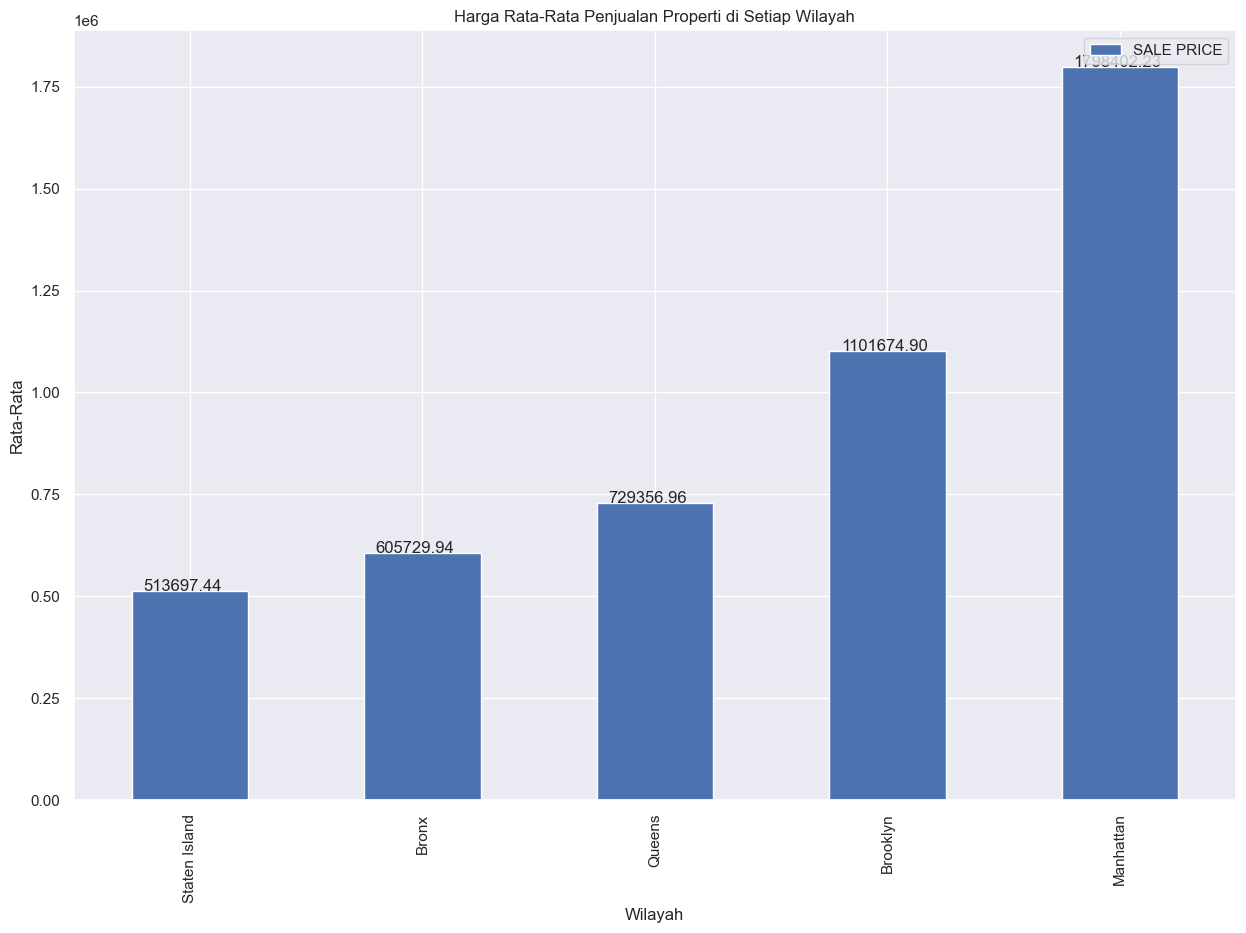

In [768]:
the_mean_saleprice_of_each_borough = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True)
the_mean_saleprice_of_each_borough.plot(kind = 'bar', figsize=(15,10))

plt.title('Harga Rata-Rata Penjualan Properti di Setiap Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Rata-Rata')
plt.text(3.8, mean_manhattan, "{:.2f}".format(mean_manhattan))
plt.text(2.8, mean_brooklyn, "{:.2f}".format(mean_brooklyn))
plt.text(1.8, mean_queens, "{:.2f}".format(mean_queens))
plt.text(0.8, mean_bronx, "{:.2f}".format(mean_bronx))
plt.text(-0.2, mean_staten_island, "{:.2f}".format(mean_staten_island))

plt.show()

Berdasarkan perhitungan dan grafik di atas dapat disimpulkan bahwa wilayah Manhattan memiliki harga rata-rata penjualan tertinggi dibandingkan wilayah lain.

### Measure of Central Tendency: Median

#### Berapa nilai median sale price berdasarkan tax class at present?

In [769]:
median_saleprice = df.pivot_table(index='TAX CLASS AT PRESENT', values='SALE PRICE', aggfunc=np.median)
median_saleprice

,SALE PRICE
TAX CLASS AT PRESENT,
1,599000.00
1A,345000.00
1B,504500.00
1C,900000.00
2,1062115.00
2A,1200000.00
2B,1875000.00
2C,1150311.00
4,1390838.00


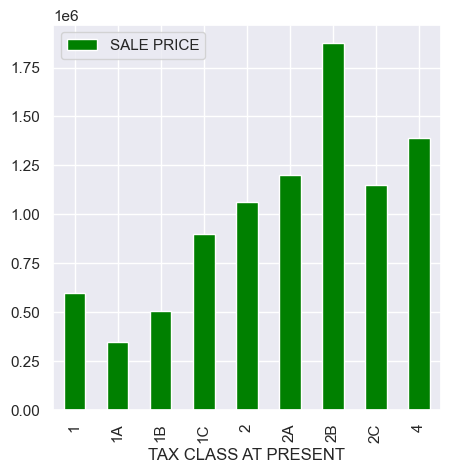

In [770]:
median_saleprice.plot(kind='bar', color='green')
plt.show()

Nilai tengah tertinggi terdapat pada tax class 2B dan terendah pada tax 1A.

### Measure of Central Tendency: Modus

In [771]:
mode_borough            = statistics.mode(df['BOROUGH'])
mode_Neighborhood       = statistics.mode(df['NEIGHBORHOOD'])
mode_BuildClassCategory = statistics.mode(df['BUILDING CLASS CATEGORY'])
print("Mode Borough                 :", mode_borough)
print("Mode Neighborhood            :", mode_Neighborhood)
print("Mode Building Class Category :", mode_BuildClassCategory )

Mode Borough                 : Queens
Mode Neighborhood            : FLUSHING-NORTH
Mode Building Class Category : 01 ONE FAMILY DWELLINGS                    


#### Kategori kelas bangunan apakah yang sering terjual di wilayah Bronx?

In [772]:
most_sold = df['BOROUGH'] == 'Bronx'
statistics.mode(df[most_sold]['BUILDING CLASS CATEGORY'])

'02 TWO FAMILY DWELLINGS                    '

Kategori kelas bangunan yang sering terjual di wilayah Bronx adalah `02 TWO FAMILY DWELLINGS`.

### Measure of Spread: Range

#### Berapa range luas Gross Square Feet dan Land Square Feet?

In [773]:
range_gross_square_feet = np.ptp(df['GROSS SQUARE FEET'])
range_land_square_feet = np.ptp(df['LAND SQUARE FEET'])
print(f"Nilai Min Gross Square Feet : {df['GROSS SQUARE FEET'].min()}")
print(f"Nilai Max Gross Square Feet : {df['GROSS SQUARE FEET'].max()}")
print(f"Nilai Min Land Square Feet : {df['LAND SQUARE FEET'].min()}")
print(f"Nilai Max Land Square Feet : {df['LAND SQUARE FEET'].max()}")
print("Range dari Gross Square Feet :", range_gross_square_feet)
print("Range dari Land Square Feet  :", range_land_square_feet)

Nilai Min Gross Square Feet : 120.0
Nilai Max Gross Square Feet : 3750565.0
Nilai Min Gross Square Feet : 200.0
Nilai Max LAND SQUARE FEET : 4228300.0
Range dari Gross Square Feet : 3750445.0
Range dari Land Square Feet  : 4228100.0


### Measure of Spread: Variance

#### Berapa nilai varians dari `SALE PRICE, LAND SQUARE FEET, dan GROSS SQUARE FEET`?

In [774]:
var_saleprice = statistics.variance(df['SALE PRICE'])
var_land_square_feet = statistics.variance(df['LAND SQUARE FEET'])
var_gross_square_feet = statistics.variance(df['GROSS SQUARE FEET'])
print("varian dari Sale Price        : ", var_saleprice)
print("Varian dari Land Square Feet  : ", var_land_square_feet)
print("Varian dari Gross Square Feet : ", var_gross_square_feet)

varian dari Sale Price        :  602474159794.4727
Varian dari Land Square Feet  :  824238021.2192081
Varian dari Gross Square Feet :  507763004.72688925


### Measure of Spread: Standard Deviation

#### Berapa nilai standar deviasi dari `SALE PRICE, LAND SQUARE FEET, dan GROSS SQUARE FEET`?

In [775]:
std_saleprice = statistics.stdev(df['SALE PRICE'])
std_land_square_feet = statistics.stdev(df['LAND SQUARE FEET'])
std_gross_square_feet = statistics.stdev(df['GROSS SQUARE FEET'])
print("Standar Deviasi dari Sale Price        : ", std_saleprice)
print("Standar Deviasi dari Land Square Feet  : ", std_land_square_feet)
print("Standar Deviasi dari Gross Square Feet : ", std_gross_square_feet)

Standar Deviasi dari Sale Price        :  776192.0894949089
Standar Deviasi dari Land Square Feet  :  28709.54582049685
Standar Deviasi dari Gross Square Feet :  22533.597243380587


### Probability Distribution

#### Probability distribution dari Sale Price di wilayah Staten Island

C:\Users\Krisyohanda\AppData\Local\Temp\ipykernel_27560\755907081.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(distribution_statenisland,


[Text(0.5, 0, 'price'),
 Text(0, 0.5, 'Kemungkinan'),
 Text(0.5, 1.0, 'Distribusi Harga Jual di wilayah Staten Island')]

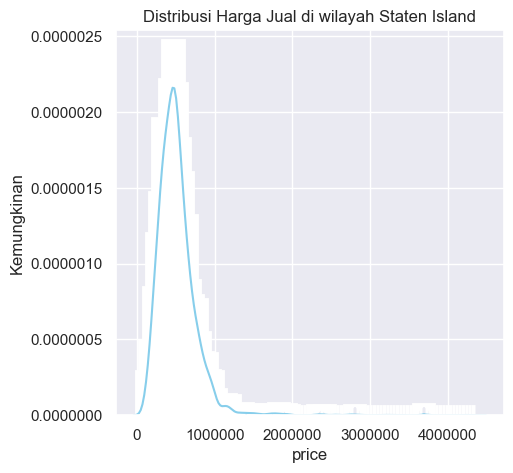

In [776]:
distribution_statenisland = df[df['BOROUGH'] == 'Staten Island']['SALE PRICE']

ax = sns.distplot(distribution_statenisland,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.ticklabel_format(style='plain')
ax.set(xlabel='price', ylabel='Kemungkinan', title='Distribusi Harga Jual di wilayah Staten Island')

C:\Users\Krisyohanda\AppData\Local\Temp\ipykernel_27560\3990878543.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, fit=norm, kde=True)


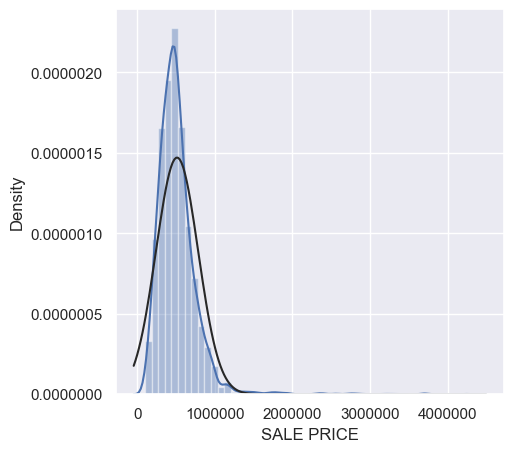

In [777]:
from scipy.stats import norm
x = pd.Series(distribution_statenisland.values, name="SALE PRICE")
ax = sns.distplot(x, fit=norm, kde=True)
ax.ticklabel_format(style='plain')

### Confidence Intervals

#### Berapa rata-rata sale price di wilayah Queens?

In [778]:
confidence_intervals=df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
pd.options.display.float_format = "{:.2f}".format
confidence_intervals

SALE PRICE                  
                    mean        std   size
BOROUGH                                   
Manhattan     1798402.23 1123858.13   4418
Bronx          605729.94  574481.64   3228
Brooklyn      1101674.90  802893.21   7877
Queens         729356.96  462138.56  12369
Staten Island  513697.44  271275.15   5480

In [779]:
#Mengekstrak parameter yang diperlukan
mean_sp_queens = confidence_intervals.iloc[3,0]
sd = confidence_intervals.iloc [3,1]
n = confidence_intervals.iloc [3,2]         
z = 1.96 #z-score untuk confidence level 95%

Menghitung standard error menggunakan formula untuk standard error dari mean

In [780]:
se = sd / np.sqrt(n)

Sekarang kita memiliki yang dibutuhkan untuk menghitung CI untuk mean sale price di wilayah Queens.

In [781]:
lcb = mean_sp_queens - z * se
ucb = mean_sp_queens + z * se

In [783]:
print(f"Itu berarti rata-rata sebenarnya dari sale price di wilayah Queens akan jatuh antara {lcb} dan {ucb}")

Itu berarti rata-rata sebenarnya dari sale price di wilayah Queens akan jatuh antara 721212.5278815193 dan 737501.3987091508


### Hypothesis Testing

In [786]:
sp = df[df['BOROUGH'] == 'Bronx']['SALE PRICE']

from scipy.stats import shapiro
stat, p = shapiro(sp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.509, p=0.000
Probably not Gaussian


Berdasarkan pengujian hipotesis, didapatkan p-value < 0.05 sehingga sampel tidak berdistribusi Gaussian.

## Kesimpulan

Berdasarkan data yang telah diolah, maka dapat ditarik sebuah kesimpulan sebagai berikut:  
- Wilayah `Manhattan` memiliki harga rata-rata penjualan properti tertinggi dibandingkan wilayah lain.
- Median tertinggi terdapat pada tax class 2B dan terendah pada tax 1A.
- Kategori class bangunan yang paling sering muncul di setiap wilayah adalah `01 ONE FAMILY DWELLINGS`.
- Berdasarkan uji hipotesis, didapatkan p-value < 0.05 sehingga sampel tidak berdistribusi Gaussian.